In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [3]:
from monetio.models import hysplit

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [4]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [5]:
from utilvolc.ashapp import ashinverse

In [6]:

projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='M'
ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}_{}.nc'.format(tag,x) for x in ens]
tdirlist = [tdir for x in ens]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'RunM')
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'RunM')
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [7]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,10):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [8]:
# initiate the InverseAshEns object
%autoreload
inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)

In [9]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunM
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunM
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [10]:
inva = inverse.invlist[1]
inva.cdump.coords

Coordinates:
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 ... 13715 15239 16763 18287
  * y          (y) int64 417 418 419 420 421 422 423 ... 483 484 485 486 487 488
  * x          (x) int64 876 877 878 879 880 881 882 ... 959 960 961 962 963 964
  * ens        (ens) object '102119_2880' '102119_3880' ... '102200_12880'
    source     <U13 'Line to 14 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...

In [11]:
# add in the relavant VOLCAT observations
%autoreload
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [75]:
%autoreload
inverse.invlist[0].print_summary()

Observations availalbe in volcat_avg_hash
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
times in cdump file
2020 10 21 19:00z
2020 10 21 20:00z
2020 10 21 21:00z
2020 10 21 22:00z
2020 10 21 23:00z
2020 10 22 00:00z
2020 10 22 01:00z
2020 10 22 02:00z
2020 10 22 03:00z
2020 10 22 04:00z
2020 10 22 05:00z
2020 10 22 06:00z
2020 10 22 07:00z
2020 10 22 08:00z
2020 10 22 09:00z
2020 10 22 10:00z
2020 10 22 11:00z


5 gep01
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


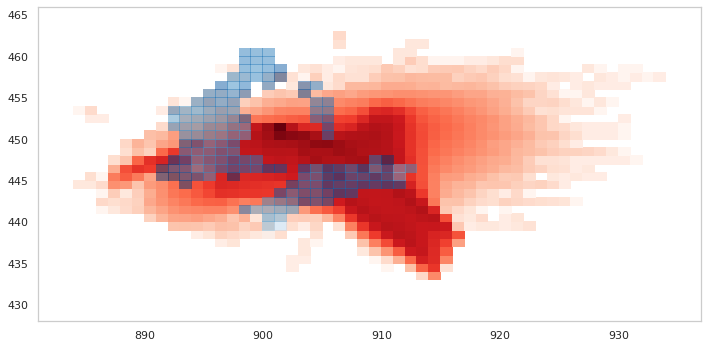

5 gep02
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


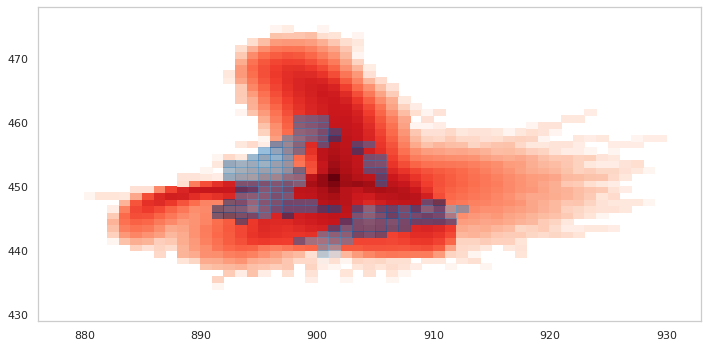

5 gep03
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


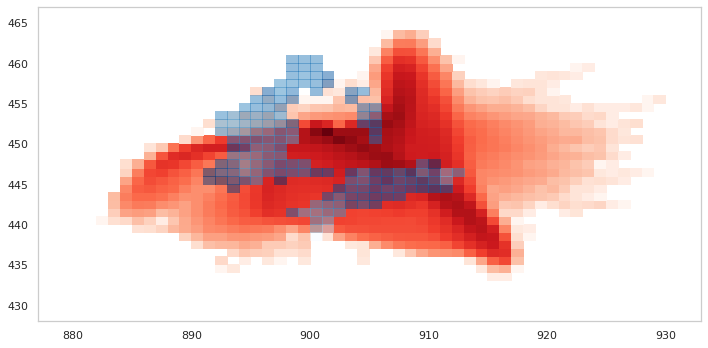

5 gep04
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


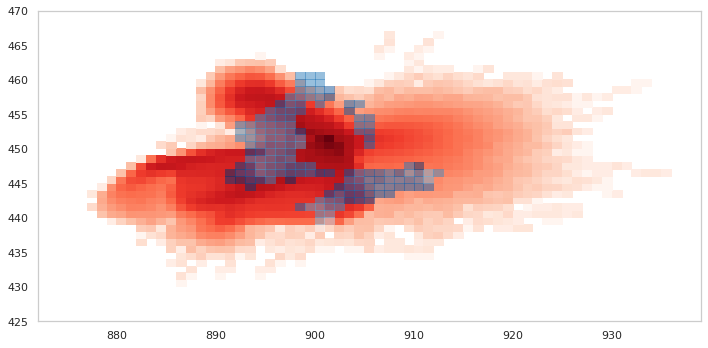

5 gep05
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


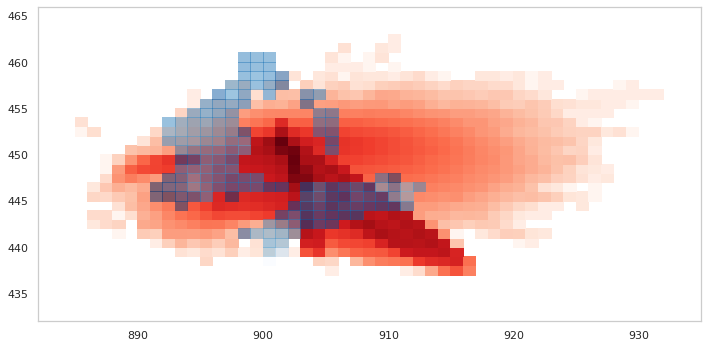

5 gep06
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


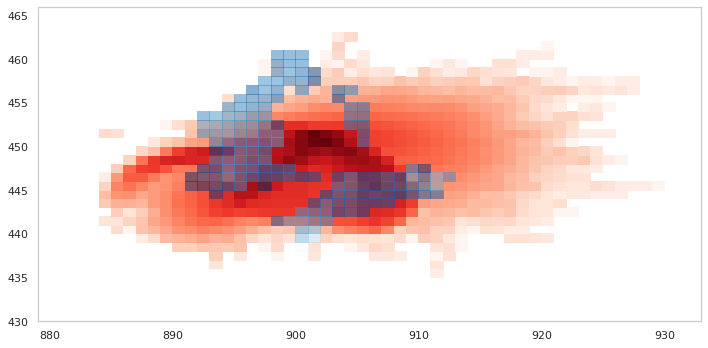

5 gep07
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


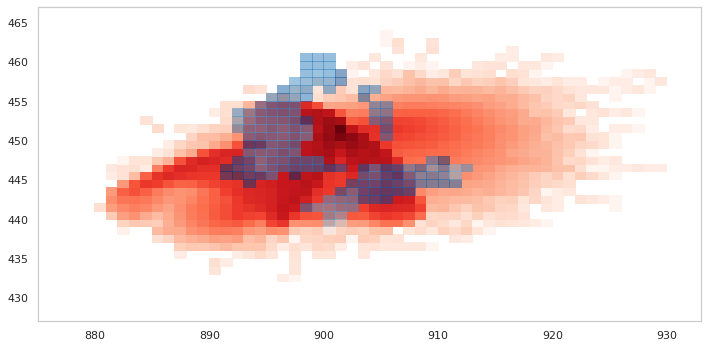

5 gep08
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


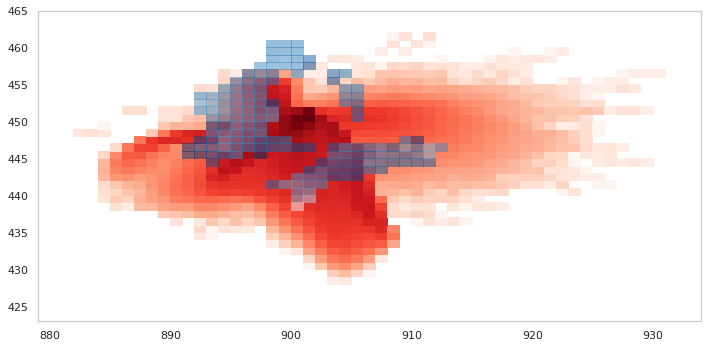

5 gep09
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


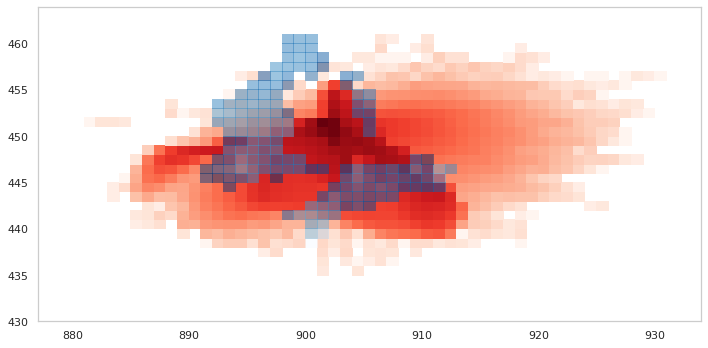

5 gep10
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


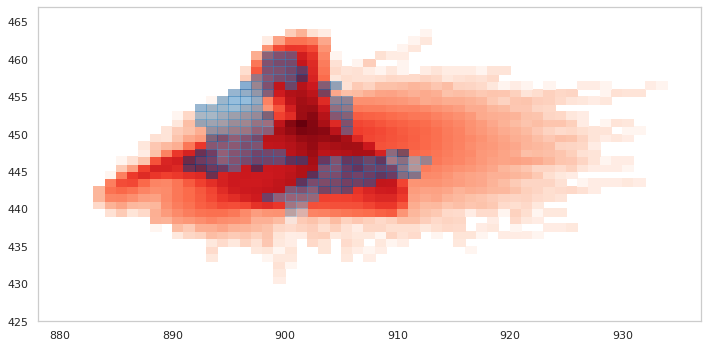

5 gep11
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


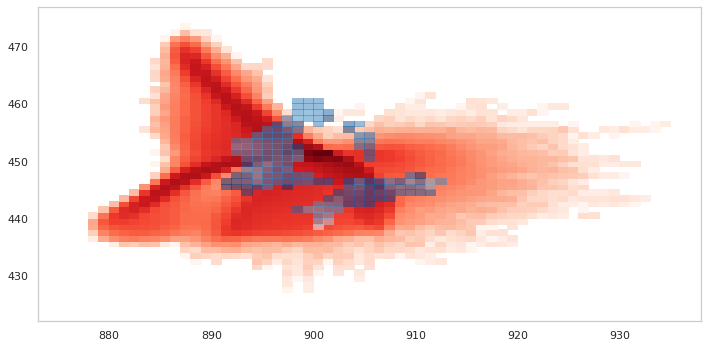

5 gep12
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


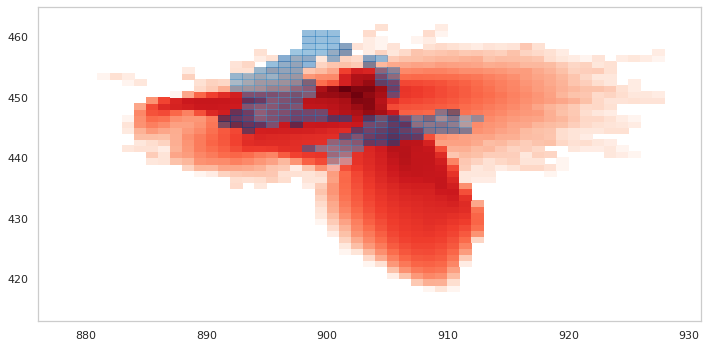

5 gep13
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


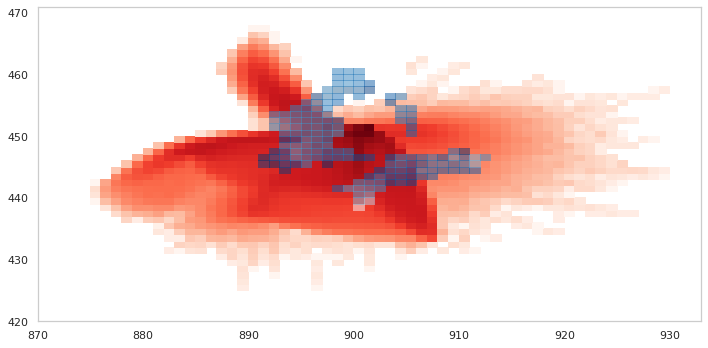

5 gep14
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


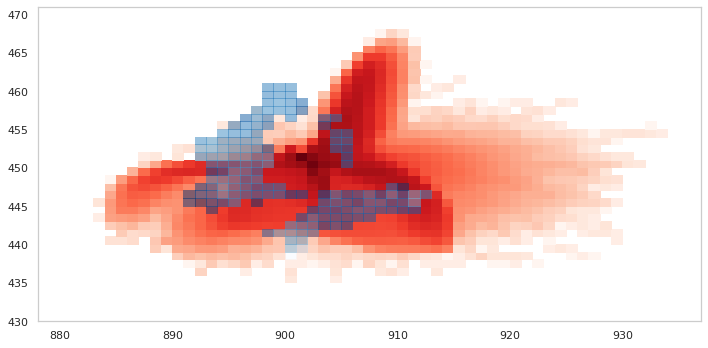

5 gep15
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


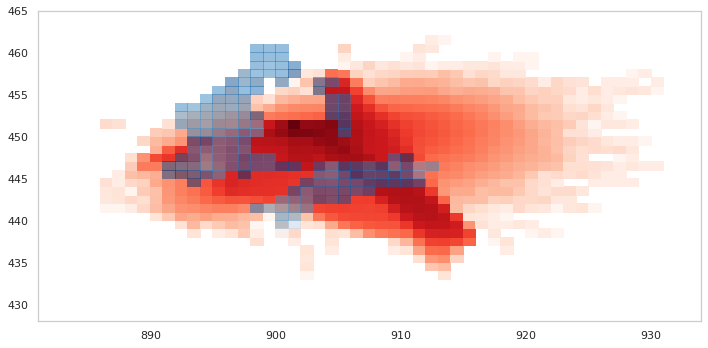

5 gep16
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


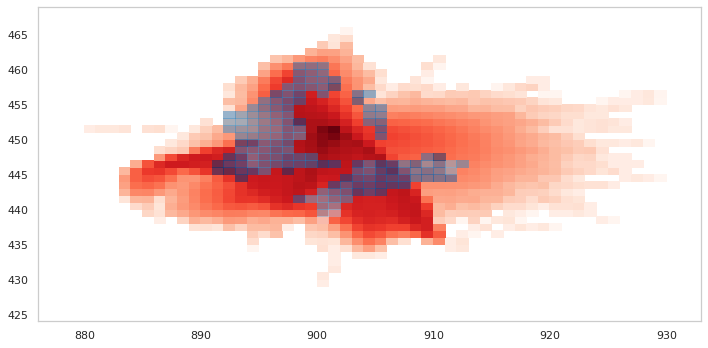

5 gep17
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


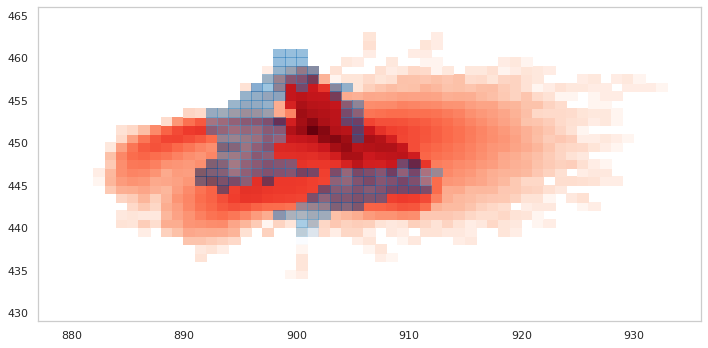

5 gep18
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


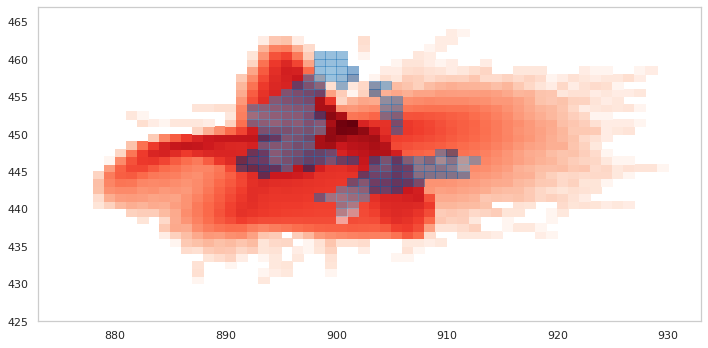

5 gep19
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


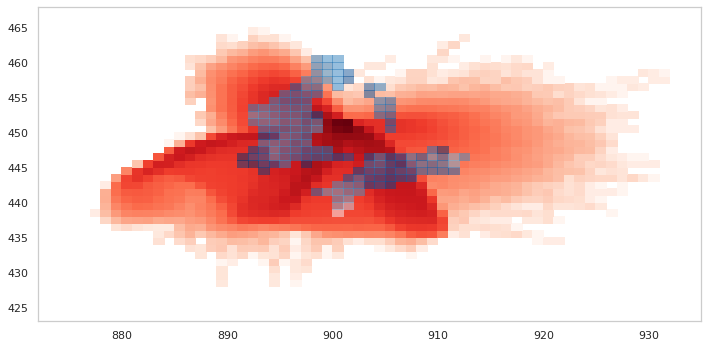

5 gep20
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


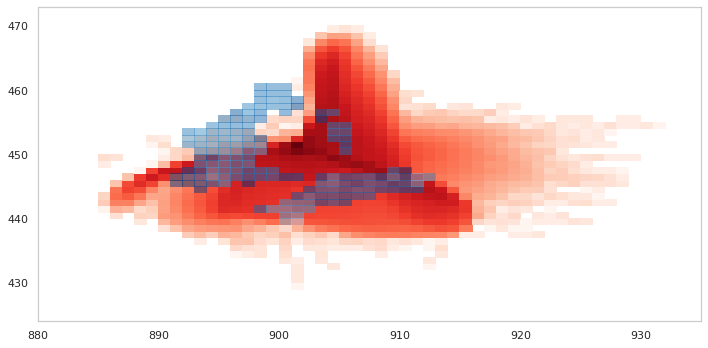

5 gep21
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


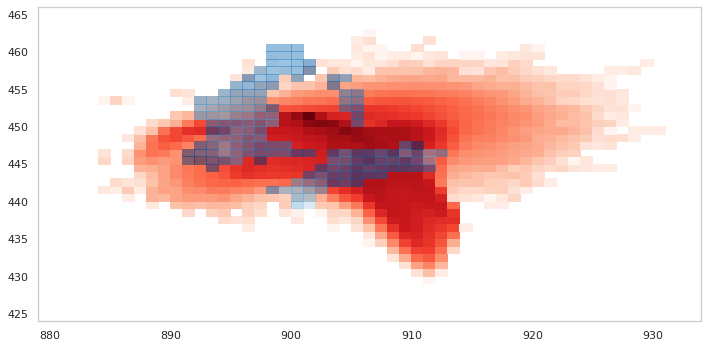

5 gep22
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


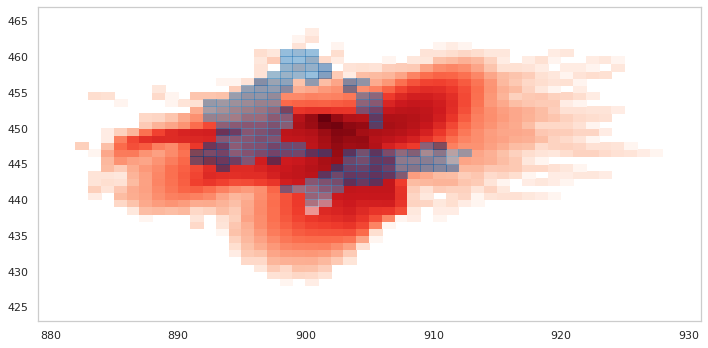

5 gep23
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


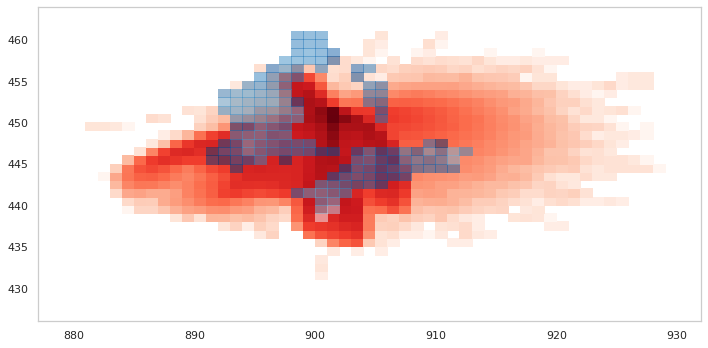

5 gep24
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


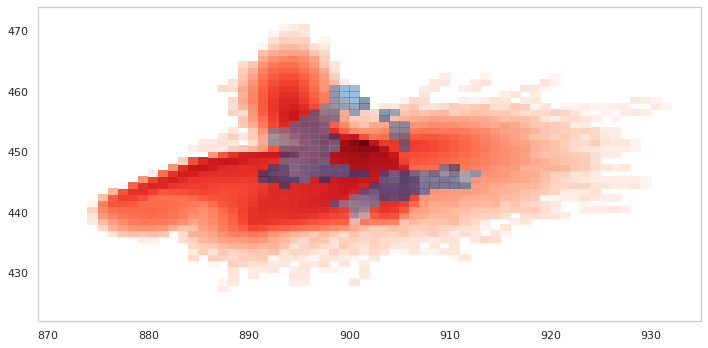

5 gep25
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


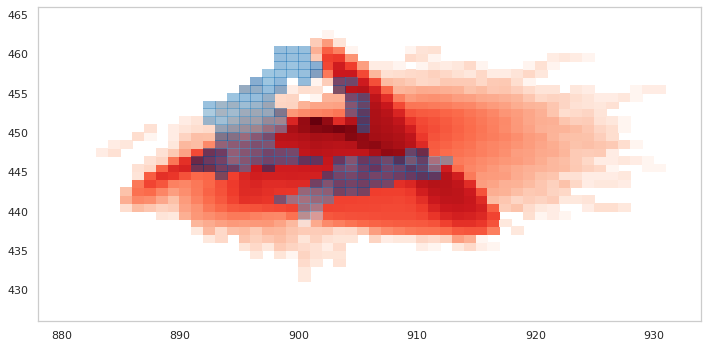

5 gep26
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


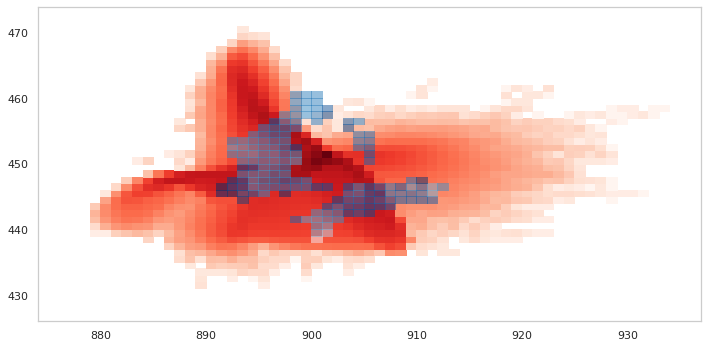

5 gep27
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


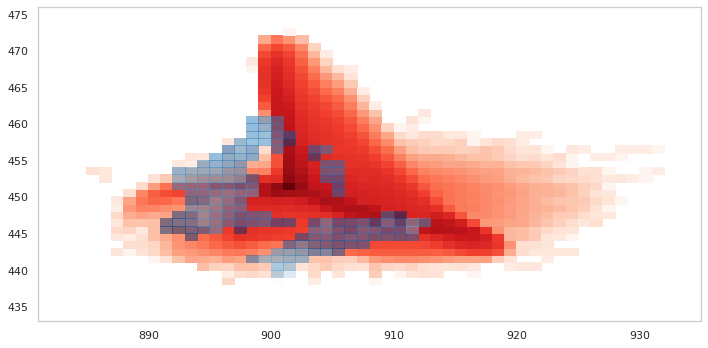

5 gep28
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


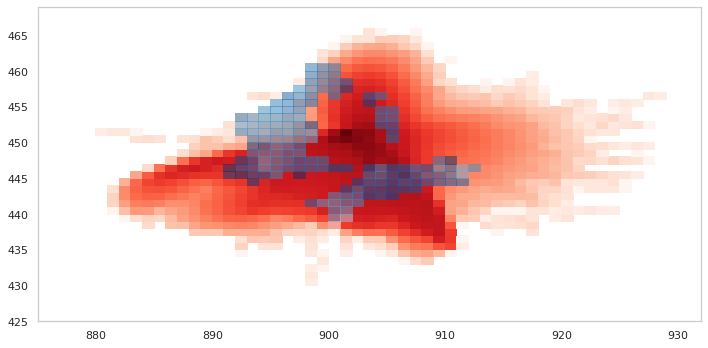

5 gep29
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


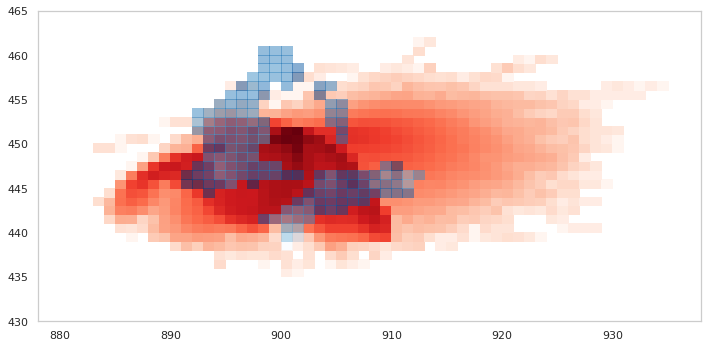

5 gep30
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


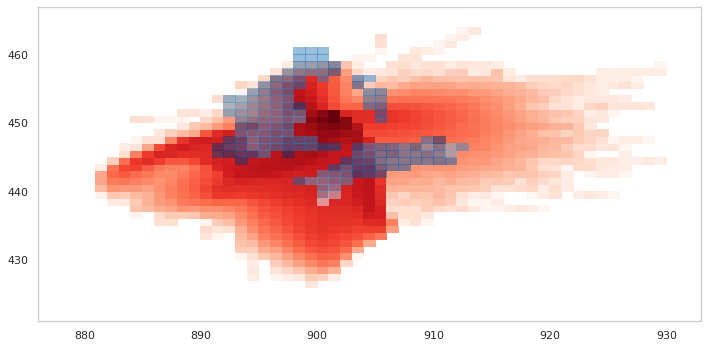

5 gec00
tii 5
<xarray.DataArray 'time' ()>
array('2020-10-22T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-22
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


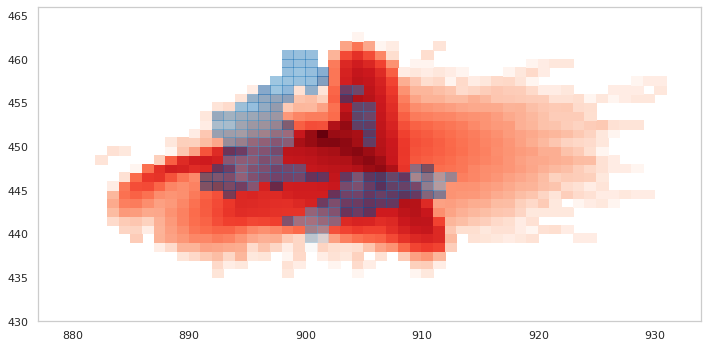

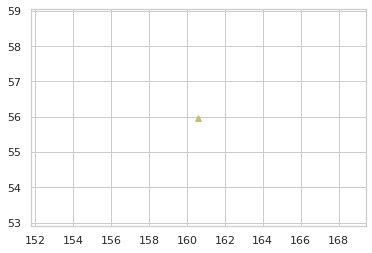

In [79]:
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index of vertical level to show.
           # if None then sum along the z index.
%autoreload
inverse.compare_plotsA(daterange=dlist[0],tii=5,zii=zlevel,vloc=None)
plt.plot(160.587,55.978,'y^')


In [56]:
%autoreload
inverse.set_concmult(1)

In [89]:
%autoreload
tii = [2]  #times to assimilate in inversion algorithm.
remove_cols=True
remove_rows=False
remove_sources = None
#remove_sources = ['12880']  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources)
runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T21:00:00.000000000


In [90]:
print(runtag)

RunM_2_TF


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:851: RuntimeWarning: divide by zero encountered in log10
  nra.append([1,0,0,0,0,0,2])


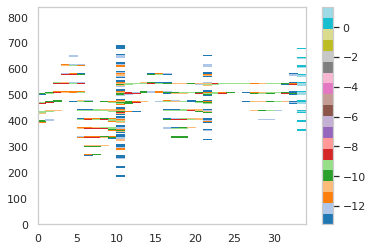

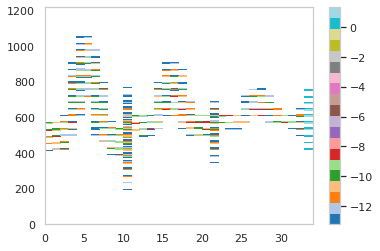

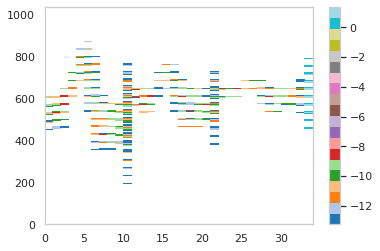

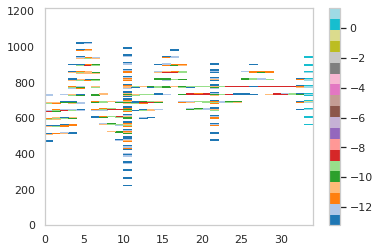

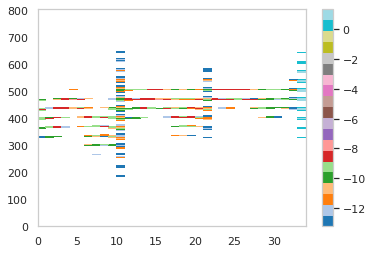

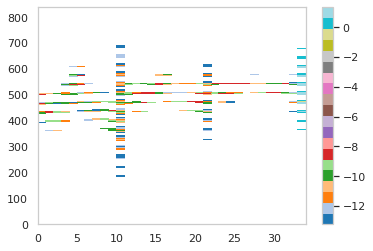

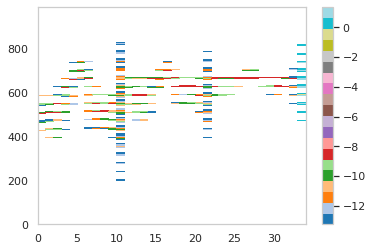

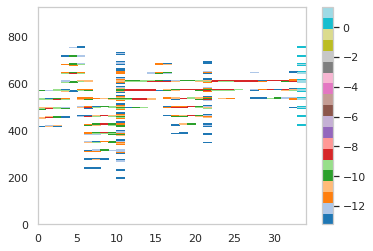

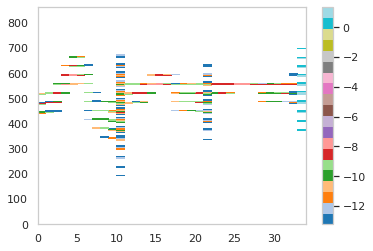

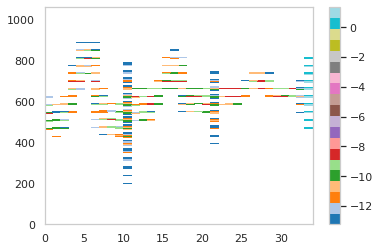

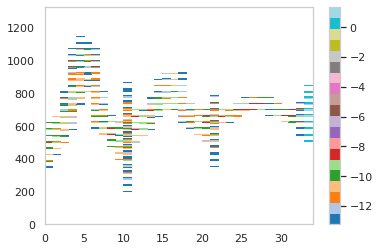

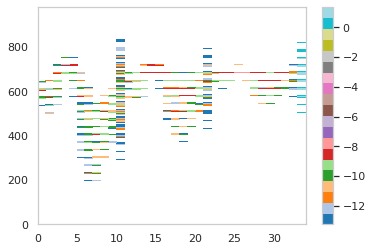

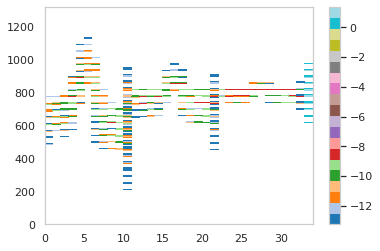

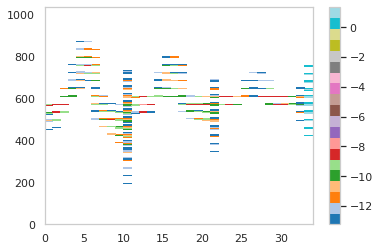

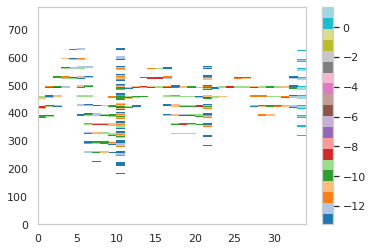

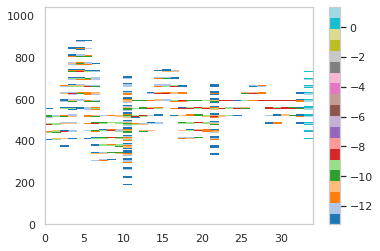

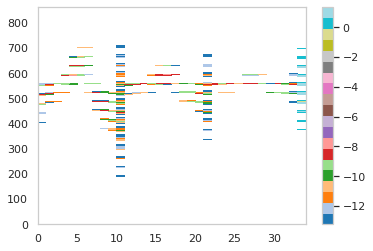

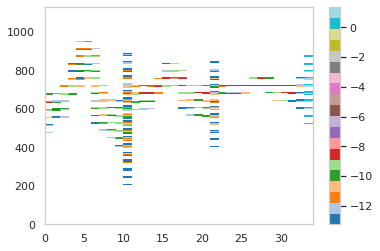

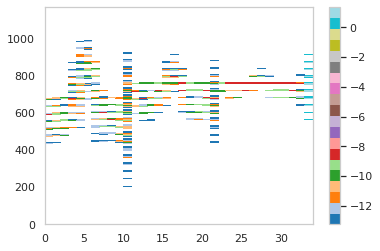

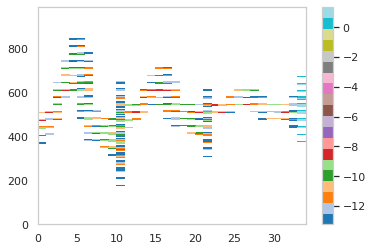

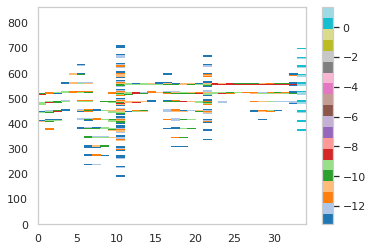

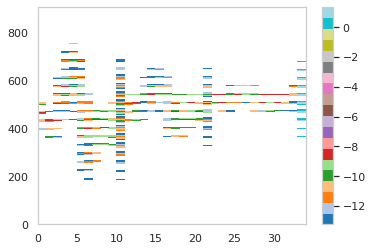

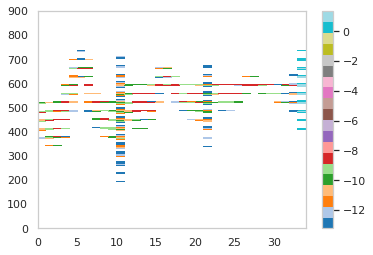

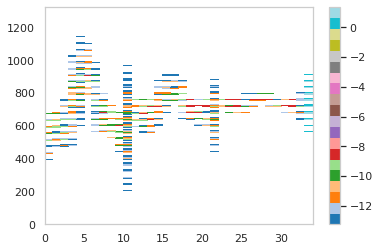

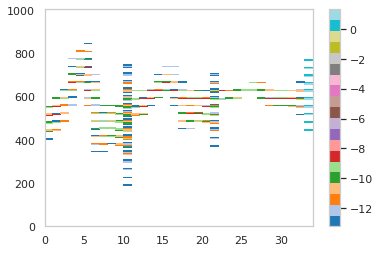

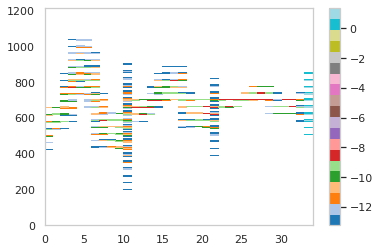

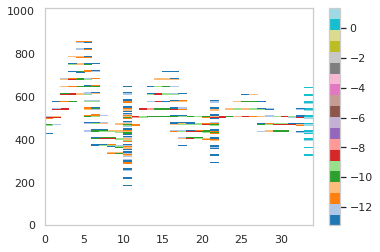

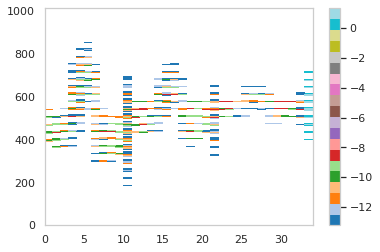

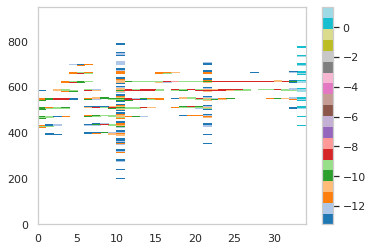

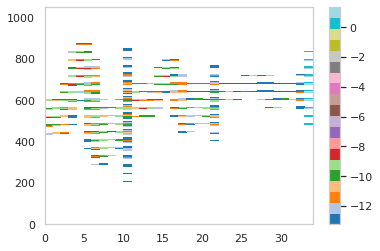

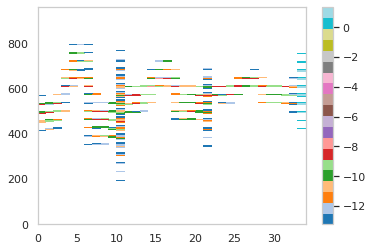

True

In [91]:
%autoreload
inverse.plot_tcm()



In [130]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)

'/hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF'

In [93]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

(840, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep01.txt
(1221, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep02.txt
(1036, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep03.txt
(1218, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep04.txt
(805, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep05.txt
(840, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep06.txt
(988, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep07.txt
(925, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep08.txt
(864, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_TF/runM4.tcm_gep09.txt
(1064, 34)
N_ctrl 33
output file /hysplit-users/alicec/projects/bezy/R

In [94]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

gep01
gep02
gep03
gep04
gep05
gep06
gep07
gep08
gep09
gep10
gep11
gep12
gep13
gep14
gep15
gep16
gep17
gep18
gep19
gep20
gep21
gep22
gep23
gep24
gep25
gep26
gep27
gep28
gep29
gep30
gec00


In [83]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

gep01


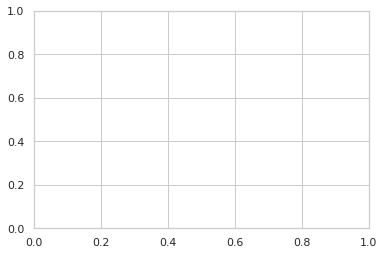

gep02


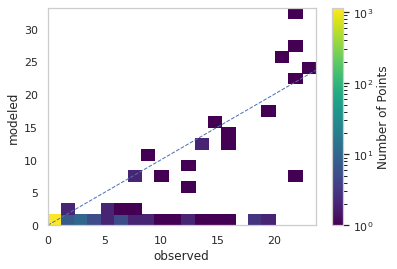

gep03


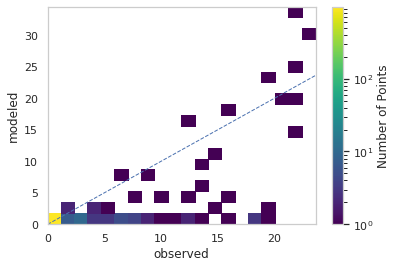

gep04


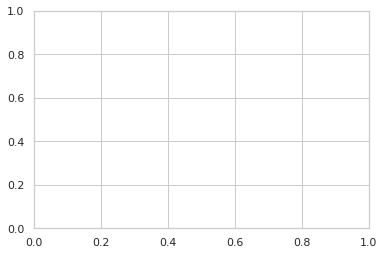

gep05


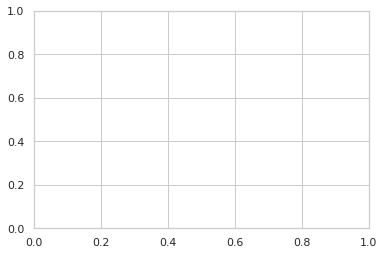

gep06


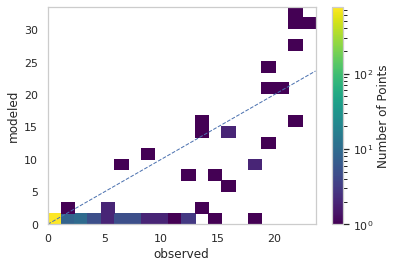

gep07


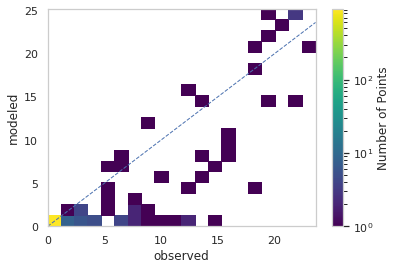

gep08


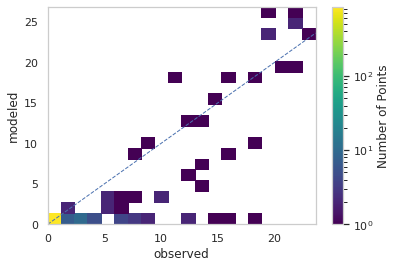

gep09


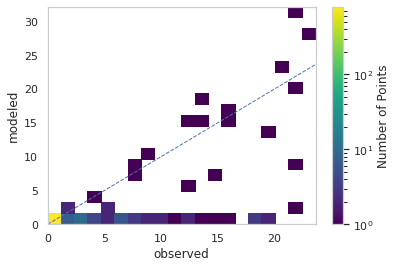

gep10


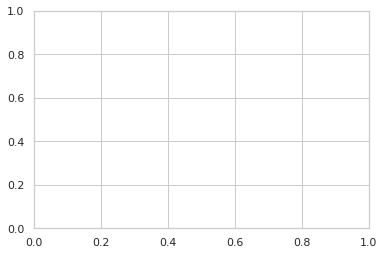

gep11


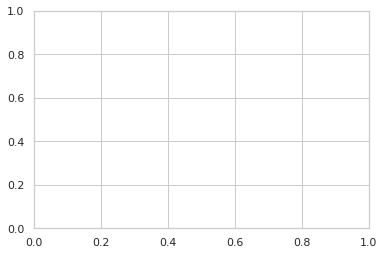

gep12


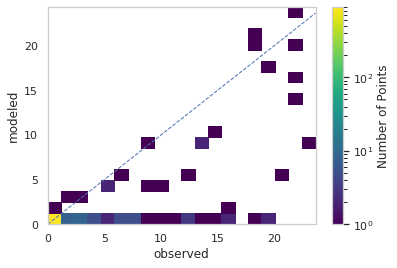

gep13


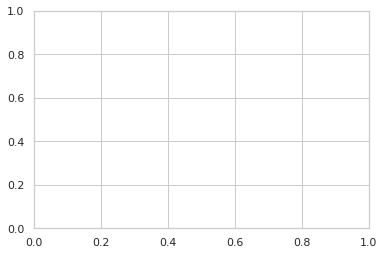

gep14


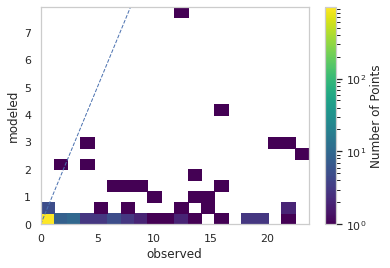

gep15


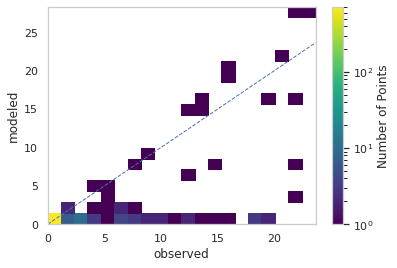

gep16


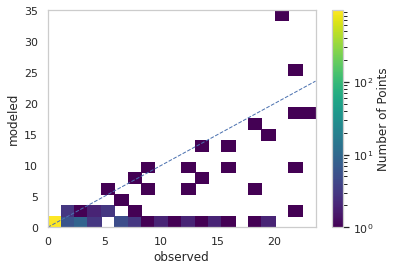

gep17


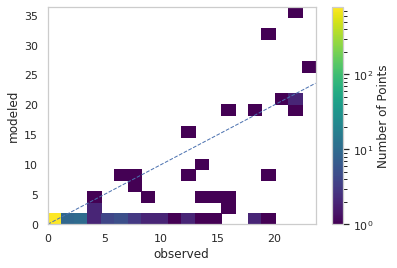

gep18


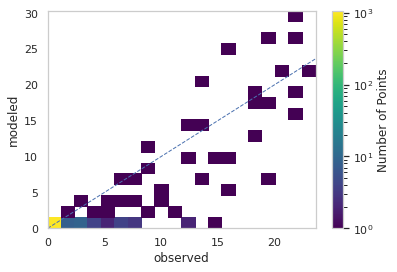

gep19


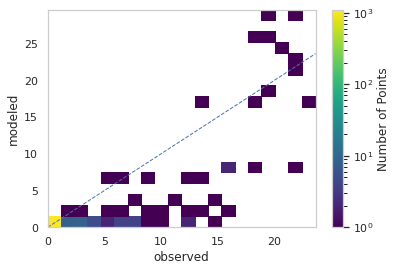

gep20


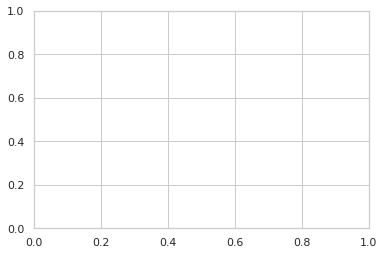

gep21


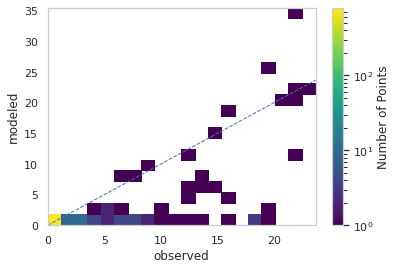

gep22


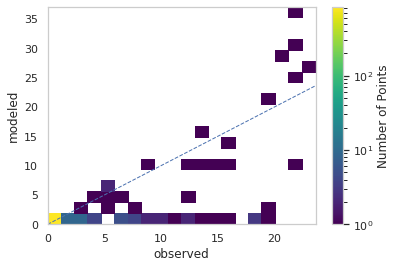

gep23


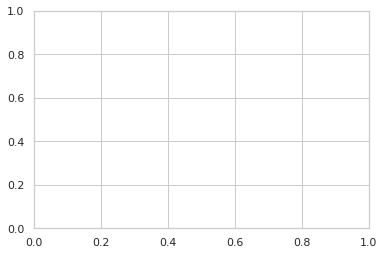

gep24


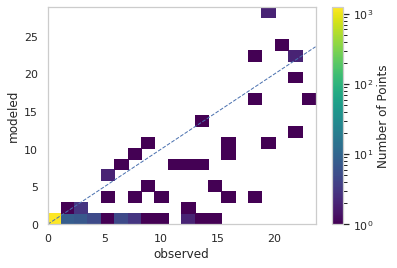

gep25


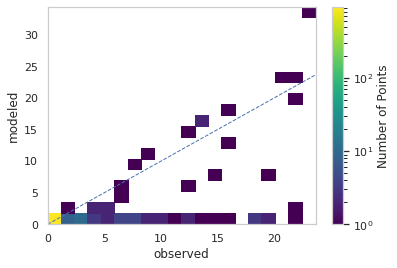

gep26


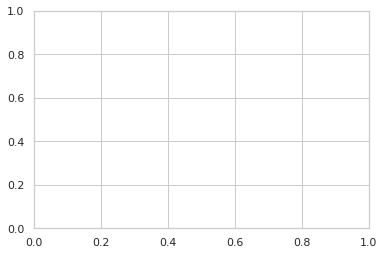

gep27


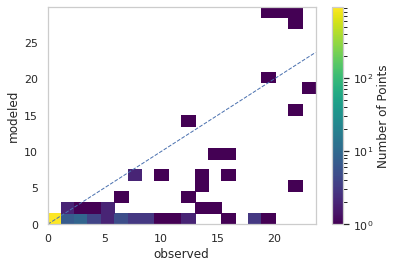

gep28


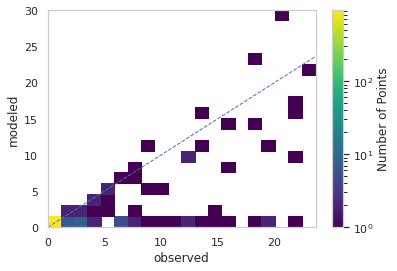

gep29


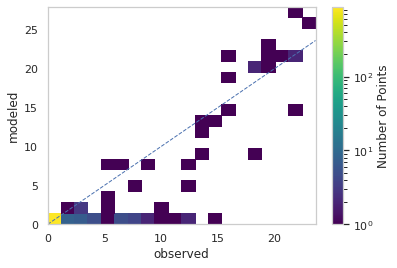

gep30


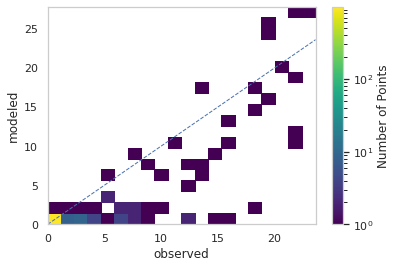

gec00


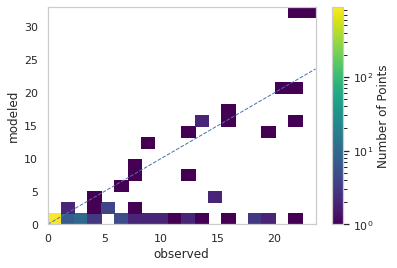

In [95]:
%autoreload
inverse.plot_outdat(eii=None)

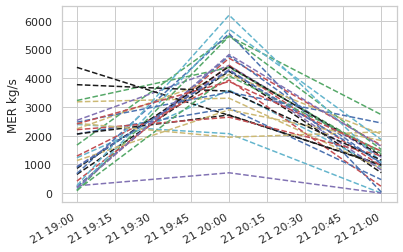

In [96]:
%autoreload
eii=[13,14,15]
eii=None
unit='g/h'
unit='kg/s'
inverse.plot_outdat_ts(eii,unit=unit)
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [97]:
#%autoreload
#inverse.sourcehash = ai.get_sourcehash(configdir,configfile)

gep07


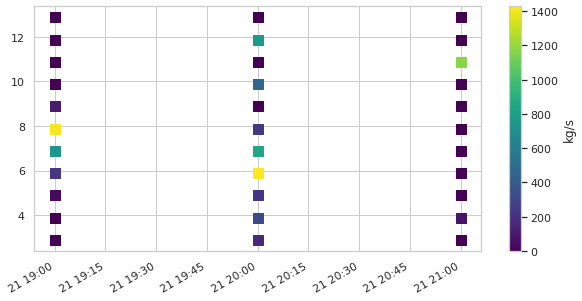

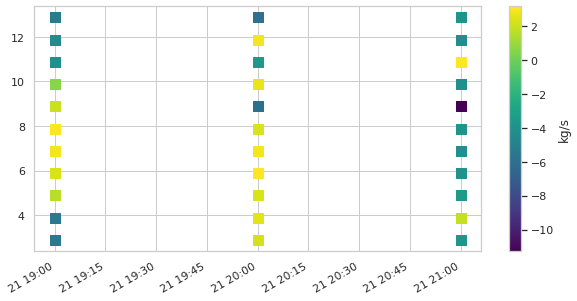

In [98]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=6
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [110]:
inverse.invlist[0].inp

{'HYSPLIT_DIR': '../hysplit',
 'MAP_DIR': '../hysplit/graphics/',
 'WORK_DIR': './',
 'CONVERT_EXE': 'convert',
 'PYTHON_EXE': '/python',
 'forecastDirectory': '../data/GEFS/',
 'archivesDirectory': '../data/GEFS/',
 'GHOSTSCRIPT_EXE': 'gs',
 'DATA_DIR': './',
 'owner': 'ARL',
 'VolcanoName': 'Bezymianny',
 'area': 785000.0,
 'top': 12880.0,
 'bottom': 2880.0,
 'start_date': datetime.datetime(2020, 10, 21, 19, 0),
 'durationOfSimulation': 12.0,
 'testminutes': 0.0,
 'emissionHours': 6.0,
 'meteorologicalData': 'GEFS',
 'EruptionSize': 0.0,
 'latitude': 55.978,
 'longitude': 160.587,
 'samplingIntervalHours': 1.0,
 'eflag': 0.0,
 'source_type': 'uniform',
 'jobname': 'ashtest',
 'runflag': 'inverse',
 'gisOption': 3,
 'zoomFactor': 50,
 'generatingPostscript': True,
 'generatingPDF': True,
 'mapBackground': 'arlmap',
 'mapProjection': 0,
 'spatialPlotRadius': 500.0,
 'graphicsResolution': 200,
 'zip_compression_level': 3,
 'rate': 1,
 'timeres': 1,
 'inv_vertical_resolution': 1000}

In [128]:
%autoreload
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunM
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunM
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [123]:
dfj = pd.DataFrame()
dfj.empty

True

In [134]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
inverse.make_efile(vloc=vloc)

In [40]:
%autoreload
inverse.run_hysplit()

running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep01
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep02
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep03
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep04
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep05
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep06
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep07
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep08
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep09
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep10
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep11
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep12
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep13
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep14
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep15
running  /hysplit-users/alicec/FBamcArea/exec/hycs_std gep16
running  /hysplit-users/

In [41]:
%autoreload
inverse.subdir = inverse.wdir
dset = inverse.create_emit_output('RunM4.nc')

unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'list'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in list <class 'numpy.ndarray'>
unknown type in lis

In [42]:
dset

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 10, y: 232, x: 550)>
array([[[[[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 

In [119]:
for attr in dset.attrs: print(type(dset.attrs[attr]), attr)

<class 'list'> Species ID
<class 'float'> sample time hours
<class 'list'> Starting Locations
<class 'str'> Source Date
<class 'str'> Meteorological Model ID
<class 'numpy.int32'> Number Start Locations
<class 'numpy.int32'> Number of Levels
<class 'numpy.ndarray'> Level top heights (m)
<class 'numpy.int32'> Number of Species
<class 'datetime.timedelta'> Sampling Time
<class 'str'> time description
<class 'dict'> Concentration Grid
<class 'str'> Coordinate time description
<class 'list'> sources
<class 'str'> Method
<class 'str'> units
<class 'str'> MetData


In [154]:
%autoreload
from utilvolc import basic_checks
dset3 = ai.update_attrs_for_netcdf(dset)

In [156]:
dset

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 10, y: 232, x: 550)>
array([[[[[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 

In [151]:
dset2.to_netcdf('test.nc')